In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Programming Projects\PROJECTS_\Customer Churn Prediction\Data\processed\Telco_Customer_Churn_Featured.csv")
print(df.shape)
print(df[['avg_charges_per_month','num_services','tenure_group','is_fiber','long_term_contract']].head())
print("Nulls:", df[['avg_charges_per_month','charges_per_service','tenure_group']].isnull().sum())

(7043, 44)
   avg_charges_per_month  num_services tenure_group  is_fiber  \
0              -1.160323             2           Q1         0   
1              -2.611953             3           Q3         0   
2              -0.362660             3           Q1         0   
3              -0.378737             4           Q4         0   
4               0.197365             1           Q1         1   

   long_term_contract  
0                   0  
1                   1  
2                   0  
3                   1  
4                   0  
Nulls: avg_charges_per_month    0
charges_per_service      0
tenure_group             0
dtype: int64


In [3]:
df = pd.read_csv(r"D:\Programming Projects\PROJECTS_\Customer Churn Prediction\Data\Telco_Customer_Chern_Cleaned.csv")
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [4]:
target = 'Churn_Yes'
features = [col for col in df.columns if col != target]

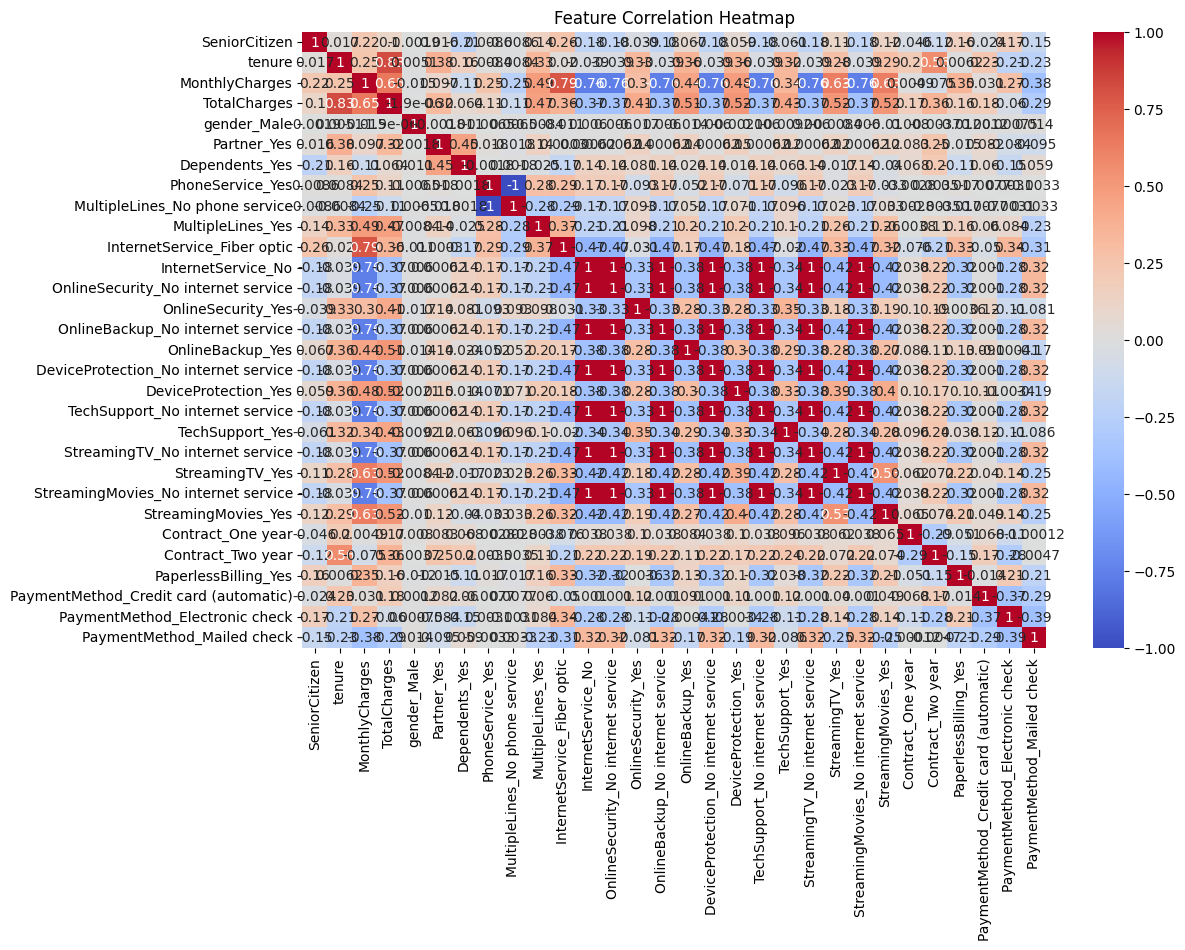

[('StreamingMovies_No internet service', 'TechSupport_No internet service'),
 ('StreamingMovies_No internet service', 'StreamingTV_No internet service'),
 ('StreamingTV_No internet service', 'DeviceProtection_No internet service'),
 ('StreamingMovies_No internet service', 'InternetService_No'),
 ('StreamingMovies_No internet service', 'OnlineBackup_No internet service'),
 ('StreamingMovies_No internet service', 'OnlineSecurity_No internet service'),
 ('StreamingMovies_No internet service',
  'DeviceProtection_No internet service'),
 ('StreamingTV_No internet service', 'TechSupport_No internet service'),
 ('StreamingTV_No internet service', 'InternetService_No'),
 ('StreamingTV_No internet service', 'StreamingMovies_No internet service'),
 ('StreamingTV_No internet service', 'OnlineSecurity_No internet service'),
 ('StreamingTV_No internet service', 'OnlineBackup_No internet service'),
 ('TechSupport_No internet service', 'InternetService_No'),
 ('TechSupport_No internet service', 'Onli

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = [(a, b) for a, b in corr_pairs.index if a != b and corr_matrix.loc[a,b] > threshold]
high_corr_pairs


tenure                                   0.074087
Contract_Two year                        0.064894
InternetService_Fiber optic              0.056753
PaymentMethod_Electronic check           0.047049
MonthlyCharges                           0.046045
TotalCharges                             0.042665
TechSupport_No internet service          0.036782
OnlineSecurity_No internet service       0.036394
StreamingMovies_No internet service      0.035965
OnlineBackup_No internet service         0.033809
StreamingTV_No internet service          0.033050
InternetService_No                       0.031566
DeviceProtection_No internet service     0.029865
Partner_Yes                              0.023295
PaperlessBilling_Yes                     0.023081
Dependents_Yes                           0.019662
TechSupport_Yes                          0.018152
Contract_One year                        0.017256
OnlineBackup_Yes                         0.012346
OnlineSecurity_Yes                       0.011075


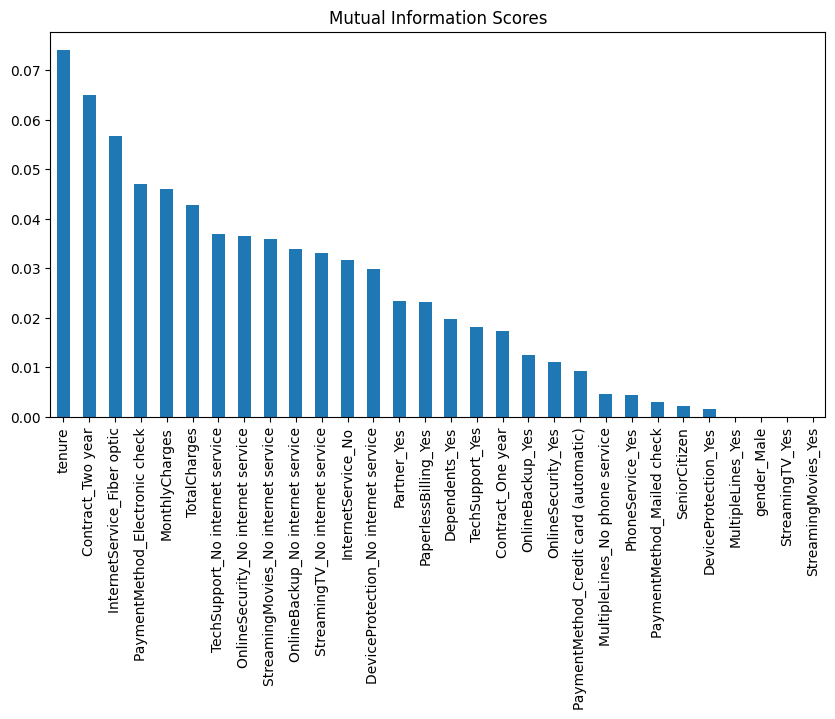

In [6]:
from sklearn.feature_selection import mutual_info_classif

X = df[features]
y = df[target]

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=features).sort_values(ascending=False)
print(mi_scores)

mi_scores.plot(kind='bar', figsize=(10,5), title="Mutual Information Scores")
plt.show()


TotalCharges                             0.192846
tenure                                   0.173395
MonthlyCharges                           0.172255
InternetService_Fiber optic              0.039823
PaymentMethod_Electronic check           0.035774
Contract_Two year                        0.032939
gender_Male                              0.028368
OnlineSecurity_Yes                       0.026899
PaperlessBilling_Yes                     0.025229
TechSupport_Yes                          0.023075
Partner_Yes                              0.022499
Contract_One year                        0.021381
OnlineBackup_Yes                         0.021092
SeniorCitizen                            0.020138
MultipleLines_Yes                        0.019965
Dependents_Yes                           0.019188
DeviceProtection_Yes                     0.018776
StreamingMovies_Yes                      0.017729
StreamingTV_Yes                          0.017202
PaymentMethod_Credit card (automatic)    0.012835


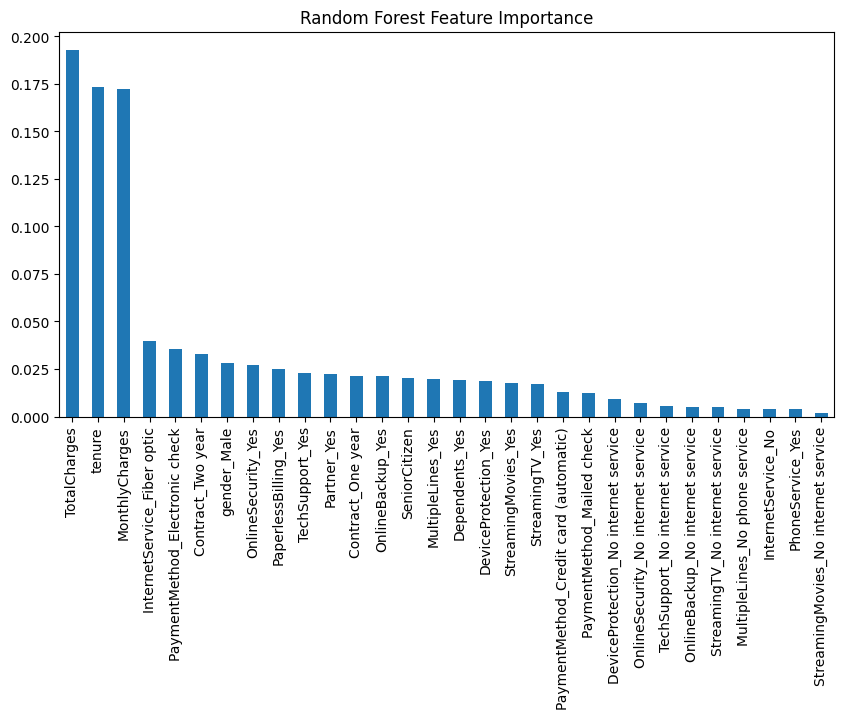

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print(importances)

# Visualize
importances.plot(kind='bar', figsize=(10,5), title="Random Forest Feature Importance")
plt.show()


In [8]:
low_importance_features = importances[importances < 0.005].index
df.drop(columns=low_importance_features, inplace=True)


In [9]:
df.to_csv("d:/Programming Projects/PROJECTS_/Customer Churn Prediction/Data/Telco_Customer_Churn_SelectedFeatures.csv", index=False)